<a href="https://www.kaggle.com/code/vanpatangan/predicting-loan-payback?scriptVersionId=274190825" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Import Libraries and Data

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", palette="muted")
plt.rcParams["figure.figsize"] = (10, 6)

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('/kaggle/input/playground-series-s5e11/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s5e11/test.csv')

# Data Overview

In [3]:
def check(df):
    """
    Generates a concise summary of DataFrame columns.
    """
    # Compute values that are constant across columns
    total_rows = len(df)
    duplicates = df.duplicated().sum()

    # Use vectorized operations 
    dtypes = df.dtypes
    instances = df.count()
    unique = df.nunique()
    sum_null = df.isnull().sum()
    #null_percentage = (df.isnull().sum() / total_rows * 100).round(2)

    # Create the summary 
    df_check = pd.DataFrame({
        'column': df.columns,
        'dtype': dtypes,
        'instances': instances,
        'unique': unique,
        'sum_null': sum_null,
        #'null_percentage': null_percentage,
        'duplicates': duplicates  
    })

    return df_check

print("Train Data")
display(check(train))
display(train.head())

print("Test Data")
display(check(test))
display(test.head())

Train Data


,column,dtype,instances,unique,sum_null,duplicates
id,id,int64,593994,593994,0,0
annual_income,annual_income,float64,593994,119728,0,0
debt_to_income_ratio,debt_to_income_ratio,float64,593994,526,0,0
credit_score,credit_score,int64,593994,399,0,0
loan_amount,loan_amount,float64,593994,111570,0,0
interest_rate,interest_rate,float64,593994,1454,0,0
gender,gender,object,593994,3,0,0
marital_status,marital_status,object,593994,4,0,0
education_level,education_level,object,593994,5,0,0
employment_status,employment_status,object,593994,5,0,0


,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
0,0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0


Test Data


,column,dtype,instances,unique,sum_null,duplicates
id,id,int64,254569,254569,0,0
annual_income,annual_income,float64,254569,67287,0,0
debt_to_income_ratio,debt_to_income_ratio,float64,254569,506,0,0
credit_score,credit_score,int64,254569,389,0,0
loan_amount,loan_amount,float64,254569,65199,0,0
interest_rate,interest_rate,float64,254569,1385,0,0
gender,gender,object,254569,3,0,0
marital_status,marital_status,object,254569,4,0,0
education_level,education_level,object,254569,5,0,0
employment_status,employment_status,object,254569,5,0,0


,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade
0,593994,28781.05,0.049,626,11461.42,14.73,Female,Single,High School,Employed,Other,D5
1,593995,46626.39,0.093,732,15492.25,12.85,Female,Married,Master's,Employed,Other,C1
2,593996,54954.89,0.367,611,3796.41,13.29,Male,Single,Bachelor's,Employed,Debt consolidation,D1
3,593997,25644.63,0.110,671,6574.30,9.57,Female,Single,Bachelor's,Employed,Debt consolidation,C3
4,593998,25169.64,0.081,688,17696.89,12.80,Female,Married,PhD,Employed,Business,C1


# EDA

In [4]:
# ---------------------------------------------
# DISTRIBUTION COMPARISON (TRAIN vs TEST)
# ---------------------------------------------
def compare_distributions(train, test, num_features):
    for col in num_features:
        plt.figure()
        sns.kdeplot(train[col], label='Train', fill=True, alpha=0.4)
        sns.kdeplot(test[col], label='Test', fill=True, alpha=0.4)
        plt.title(f"Distribution of {col} (Train vs Test)")
        plt.legend()
        plt.tight_layout()
        plt.show()


def compare_categorical_proportions(train, test, cat_features):
    for col in cat_features:
        plt.figure(figsize=(8,4))
        train_counts = train[col].value_counts(normalize=True)
        test_counts = test[col].value_counts(normalize=True)
        compare_df = pd.concat([train_counts, test_counts], axis=1)
        compare_df.columns = ["Train", "Test"]
        compare_df.plot(kind='bar', width=0.7)
        plt.title(f"{col} Proportion (Train vs Test)")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# ---------------------------------------------
# TARGET RELATIONSHIPS
# ---------------------------------------------
def numeric_vs_target(train, num_features, target='loan_paid_back'):
    for col in num_features:
        plt.figure()
        sns.boxplot(x=target, y=col, data=train, palette="coolwarm")
        plt.title(f"{col} vs {target}")
        plt.tight_layout()
        plt.show()


def scatter_with_target(train, x, y, target='loan_paid_back'):
    plt.figure()
    sns.scatterplot(
        data=train,
        x=x,
        y=y,
        hue=target,
        alpha=0.5,
        palette="viridis"
    )
    plt.title(f"{y} vs {x} colored by {target}")
    plt.tight_layout()
    plt.show()

# ---------------------------------------------
# DEMOGRAPHIC ANALYSIS
# ---------------------------------------------
def demographic_target_rate(train, cat_features, target='loan_paid_back'):
    for col in cat_features:
        plt.figure(figsize=(8,4))
        sns.barplot(
            data=train,
            x=col,
            y=target,
            estimator=np.mean,
            order=train[col].value_counts().index
        )
        plt.title(f"Average {target} by {col}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# ---------------------------------------------
# LOAN PURPOSE & GRADE
# ---------------------------------------------
def purpose_and_grade_analysis(train, target='loan_paid_back'):
    # Loan purpose
    plt.figure(figsize=(10,5))
    sns.barplot(
        data=train,
        x='loan_purpose',
        y=target,
        estimator=np.mean,
        order=train.groupby('loan_purpose')[target].mean().sort_values(ascending=False).index
    )
    plt.title("Average Loan Repayment by Loan Purpose")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Grade subgrade
    plt.figure(figsize=(12,5))
    sns.barplot(
        data=train,
        x='grade_subgrade',
        y=target,
        estimator=np.mean,
        order=train.groupby('grade_subgrade')[target].mean().sort_values(ascending=False).index
    )
    plt.title("Average Loan Repayment by Grade/Subgrade")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# ---------------------------------------------
# FEATURE INTERACTIONS
# ---------------------------------------------
def credit_heatmap(train, credit_col='credit_score', dti_col='debt_to_income_ratio', target='loan_paid_back'):
    df = train.copy()
    df['credit_bin'] = pd.qcut(df[credit_col], q=10, duplicates='drop')
    df['dti_bin'] = pd.qcut(df[dti_col], q=10, duplicates='drop')

    pivot = df.pivot_table(values=target, index='credit_bin', columns='dti_bin', aggfunc='mean')
    plt.figure(figsize=(10,8))
    sns.heatmap(pivot, cmap='YlGnBu', annot=False)
    plt.title(f"{target} rate by Credit Score & Debt-to-Income bins")
    plt.tight_layout()
    plt.show()

# ---------------------------------------------
# CORRELATION MATRIX
# ---------------------------------------------
def correlation_heatmap(train, target='loan_paid_back'):
    numeric_df = train.select_dtypes(include=[np.number])
    corr = numeric_df.corr()
    plt.figure(figsize=(10,8))
    sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
    plt.title("Feature Correlation Heatmap")
    plt.tight_layout()
    plt.show()

1️⃣ Comparing distributions...


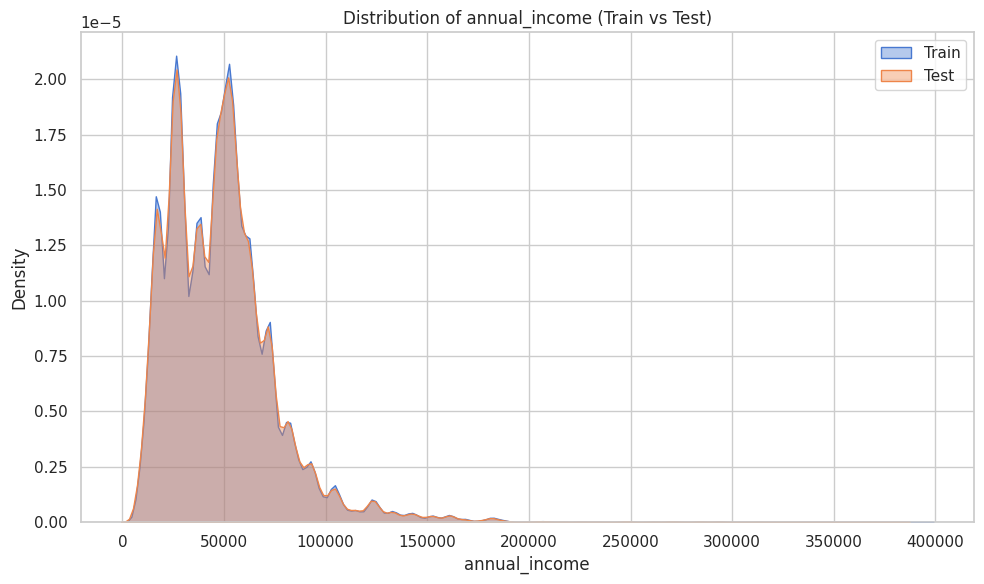

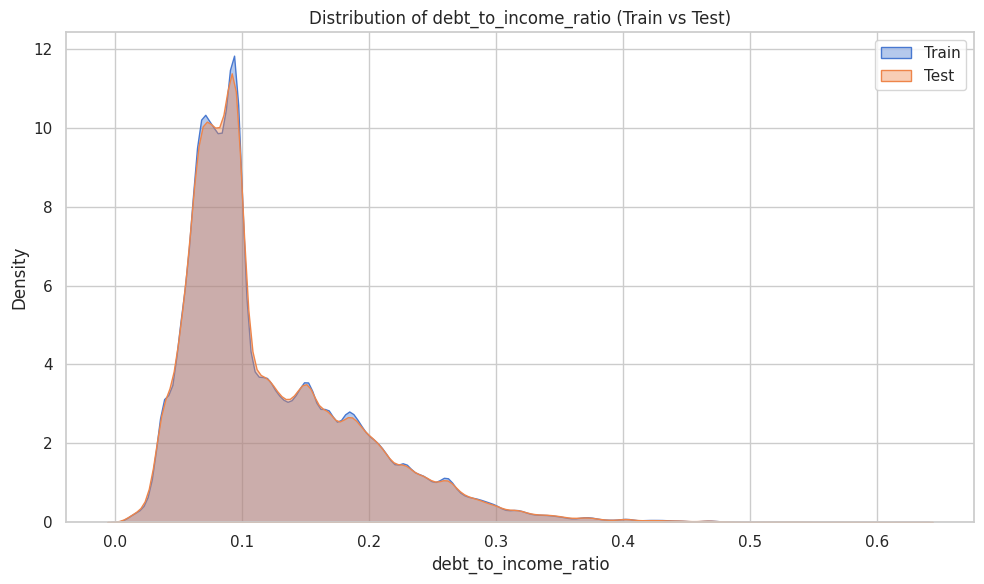

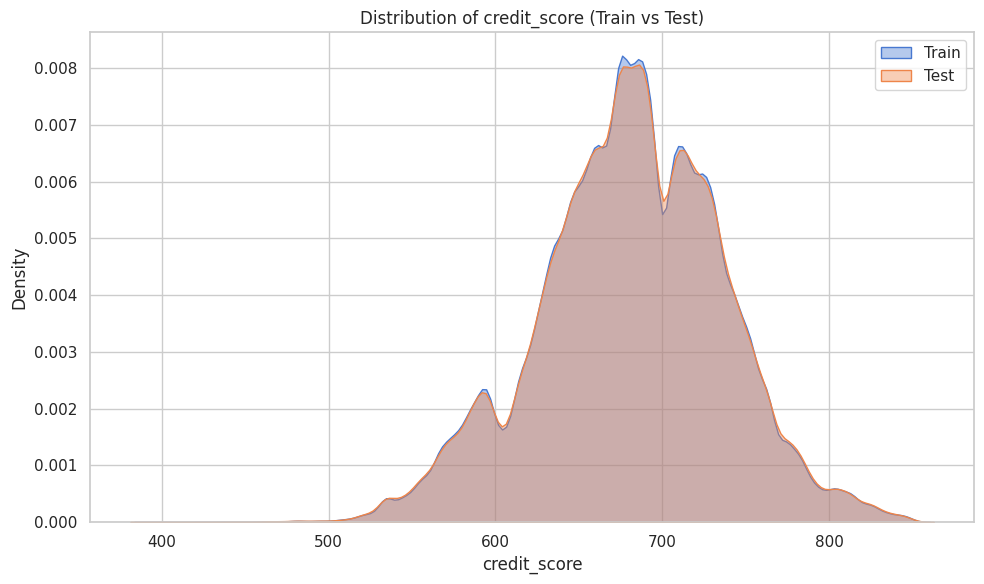

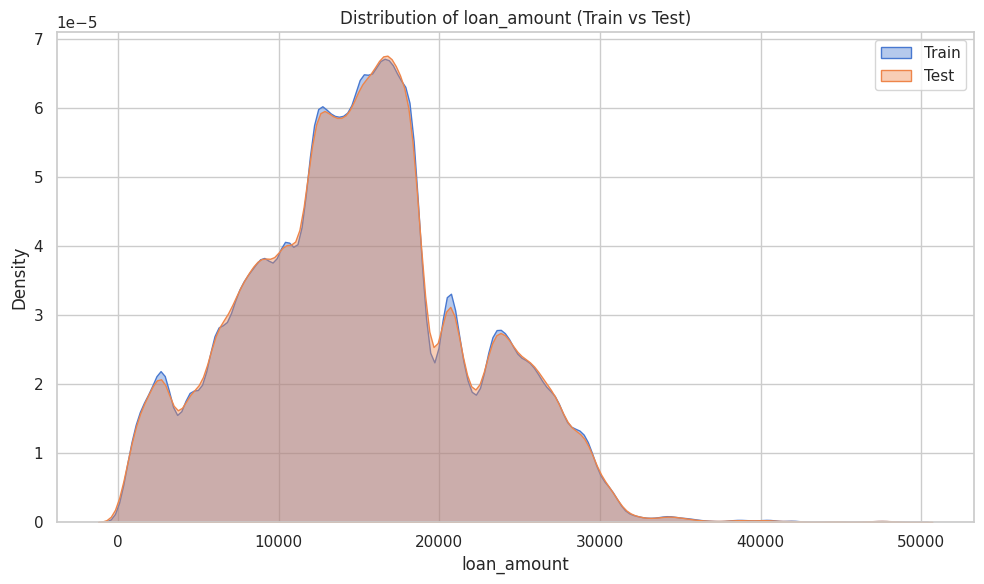

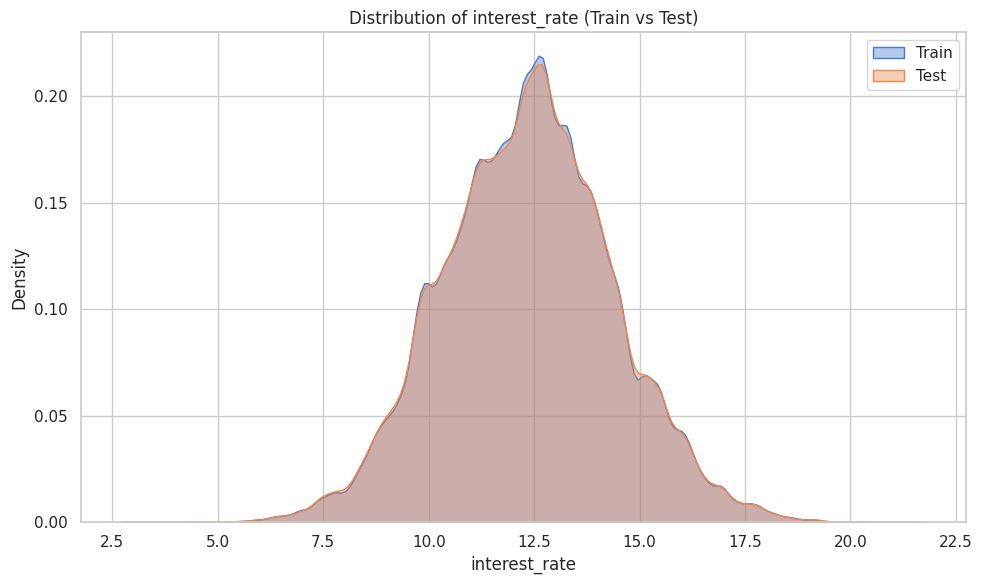

<Figure size 800x400 with 0 Axes>

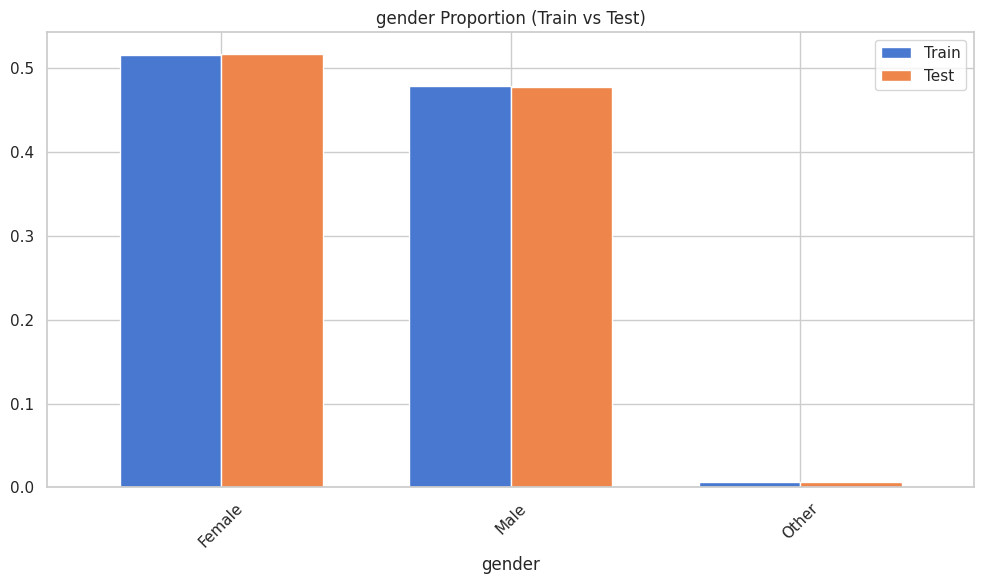

<Figure size 800x400 with 0 Axes>

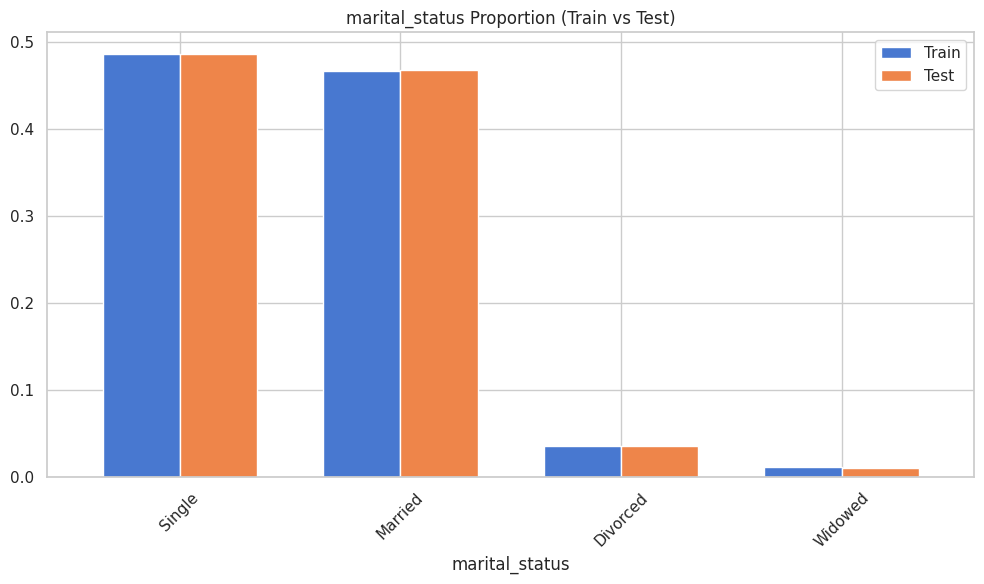

<Figure size 800x400 with 0 Axes>

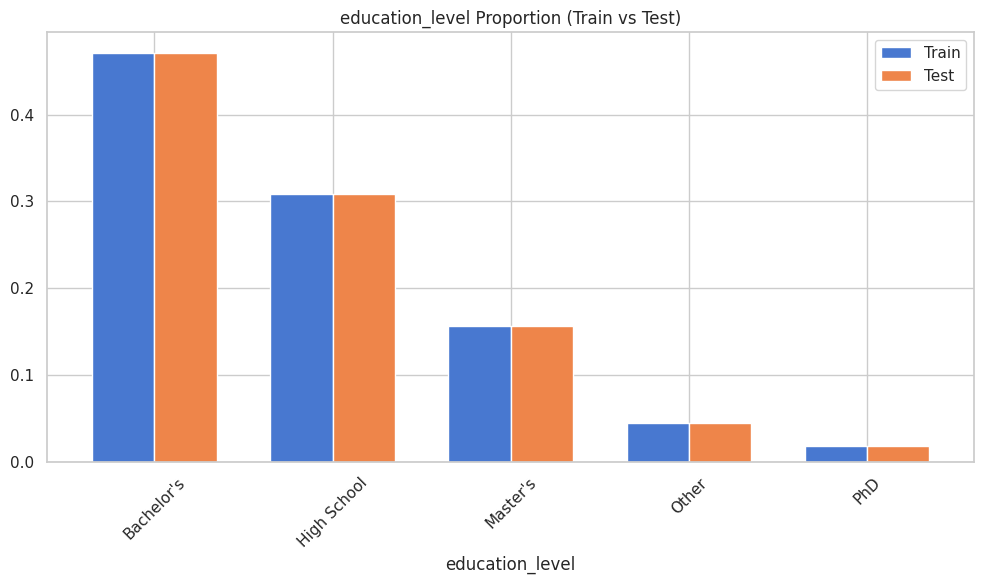

<Figure size 800x400 with 0 Axes>

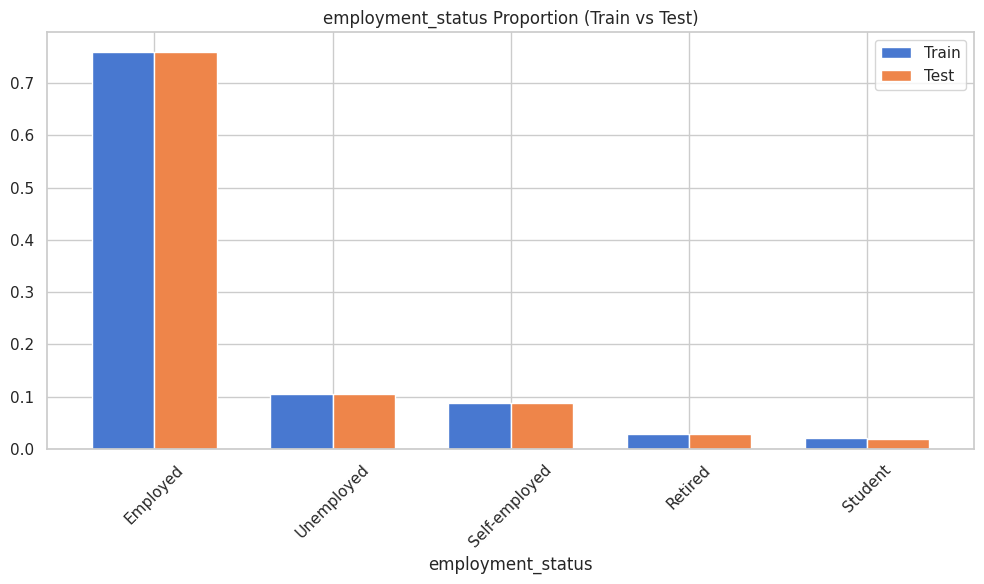

<Figure size 800x400 with 0 Axes>

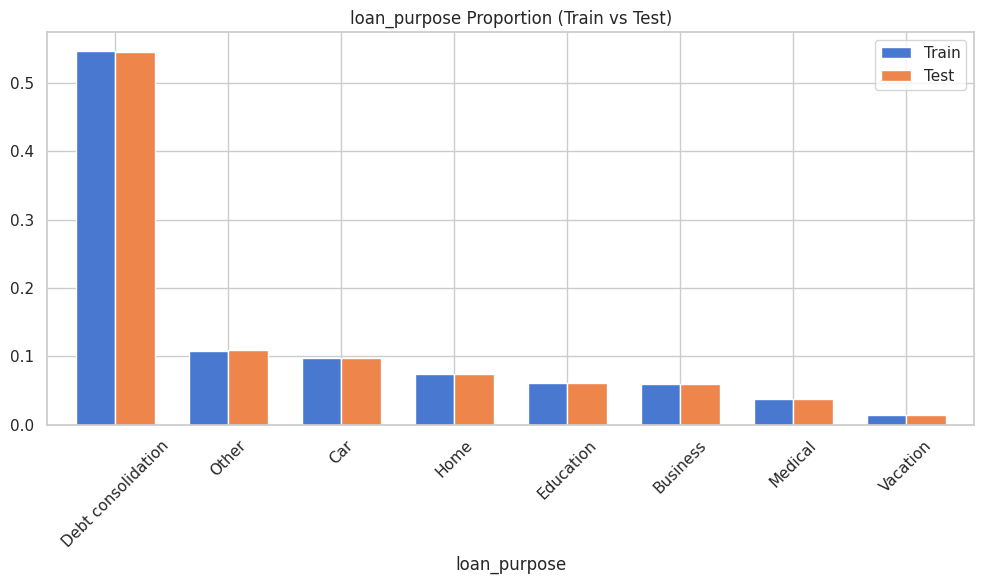

<Figure size 800x400 with 0 Axes>

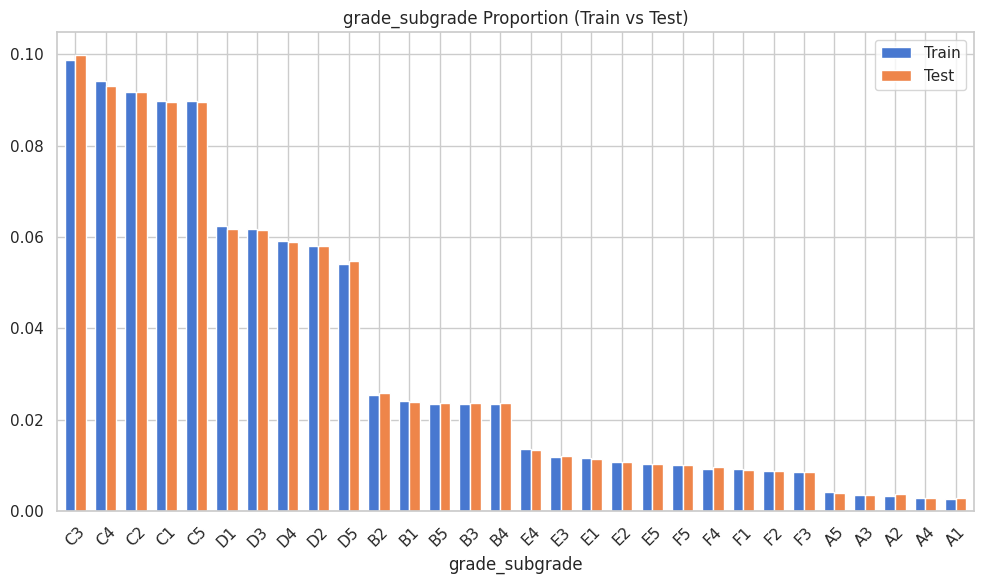

2️⃣ Exploring target relationships...


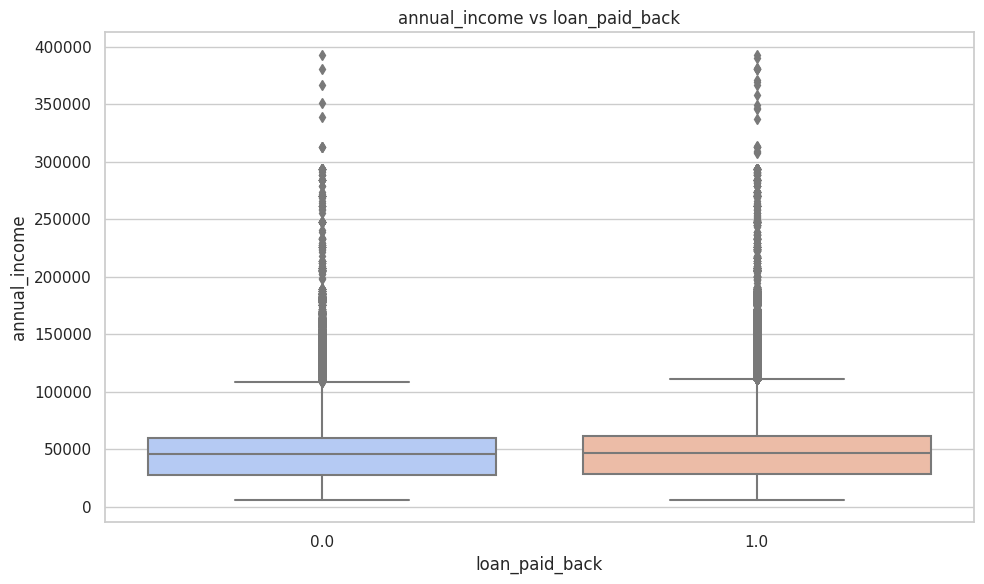

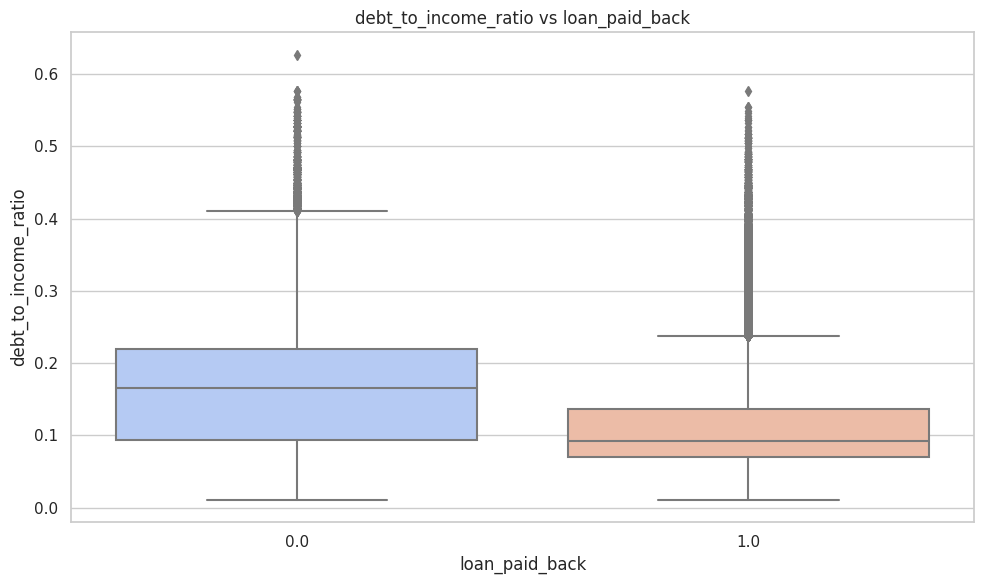

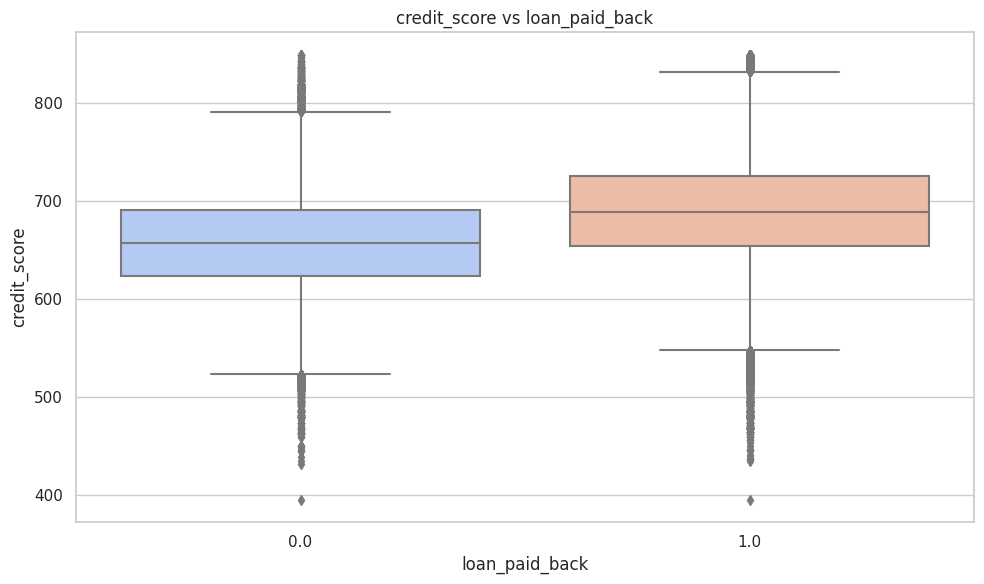

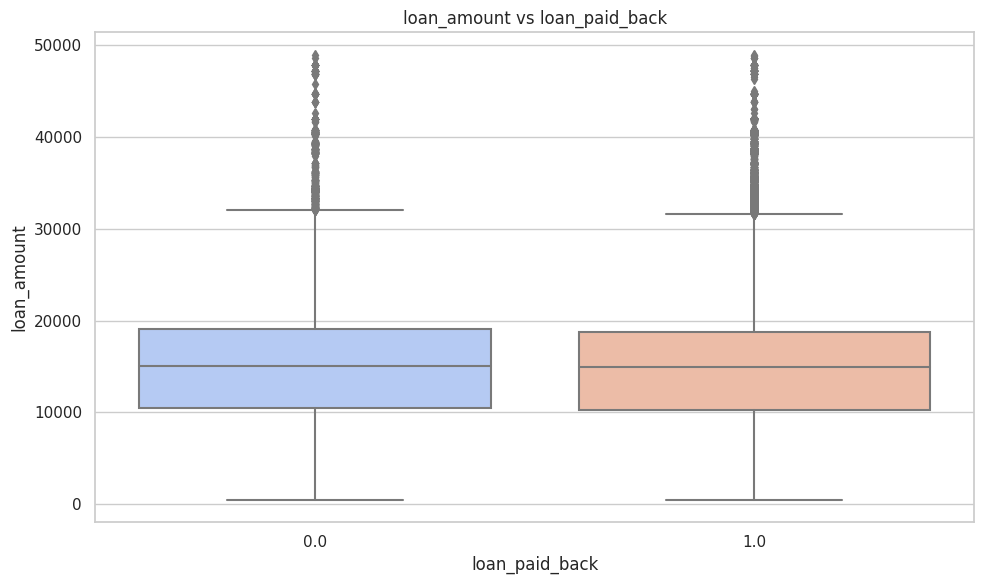

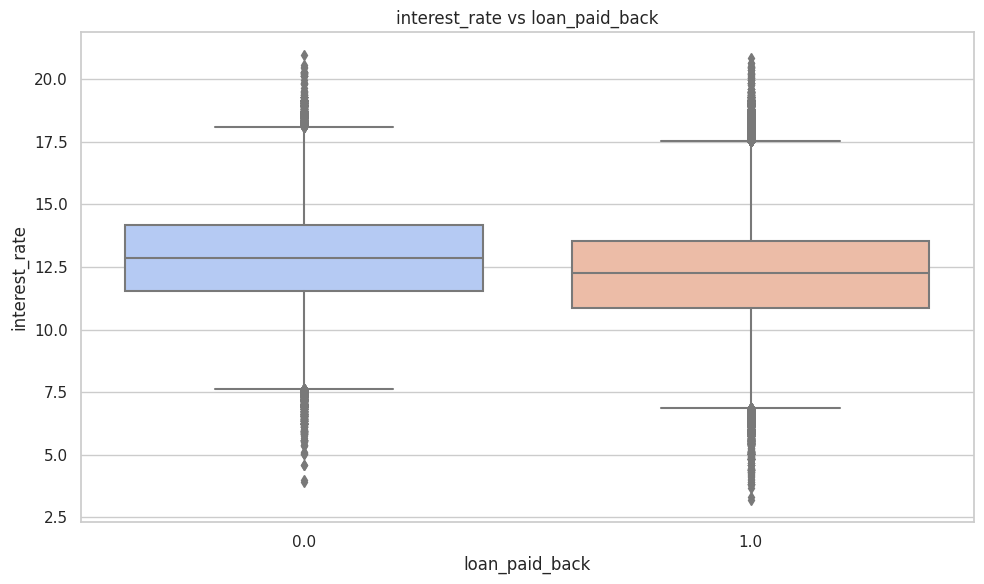

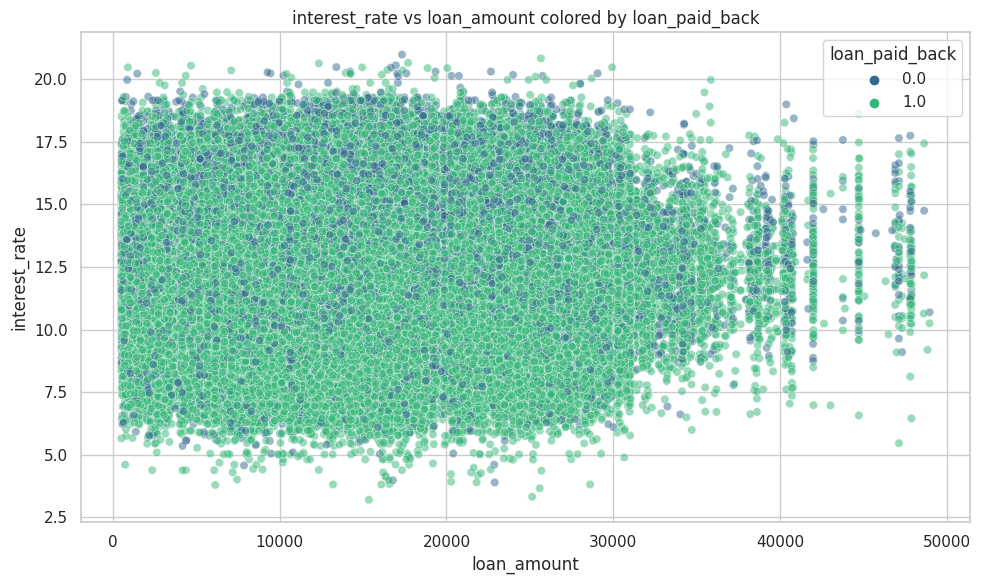

3️⃣ Demographic analysis...


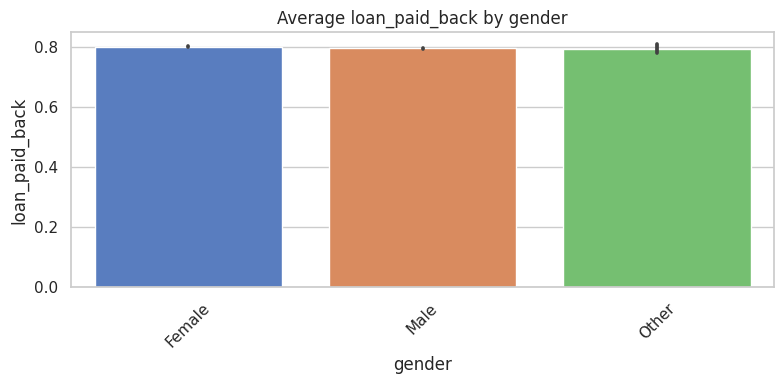

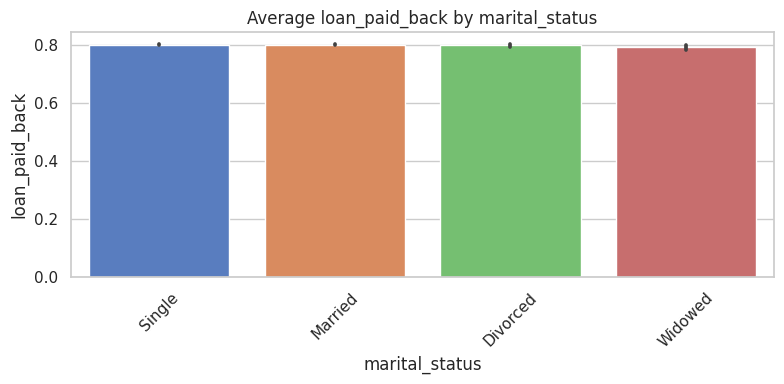

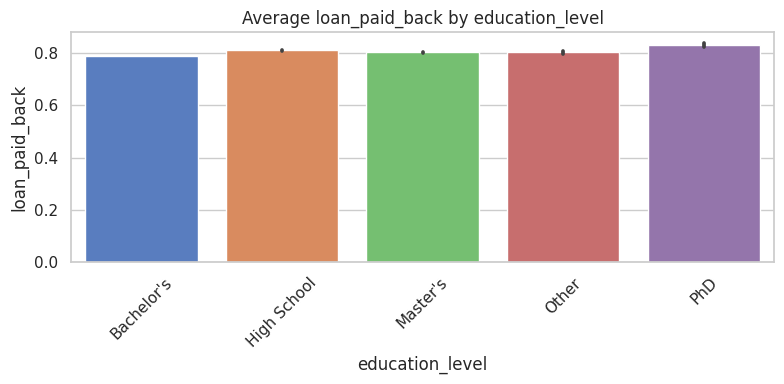

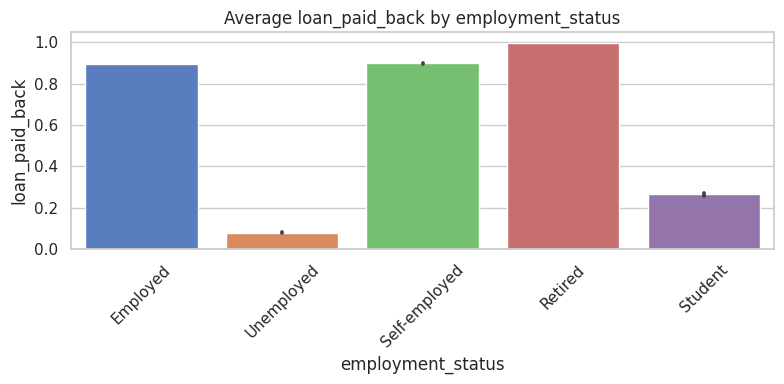

4️⃣ Loan purpose & grade analysis...


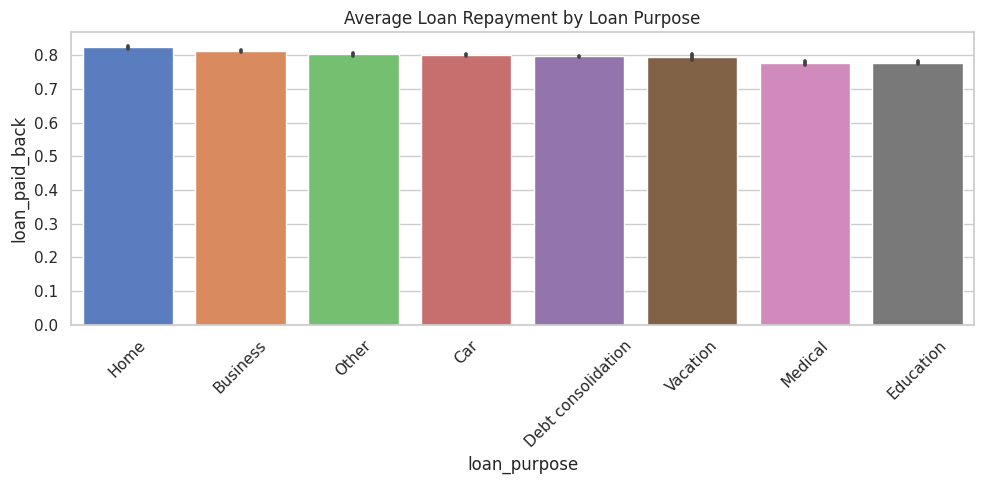

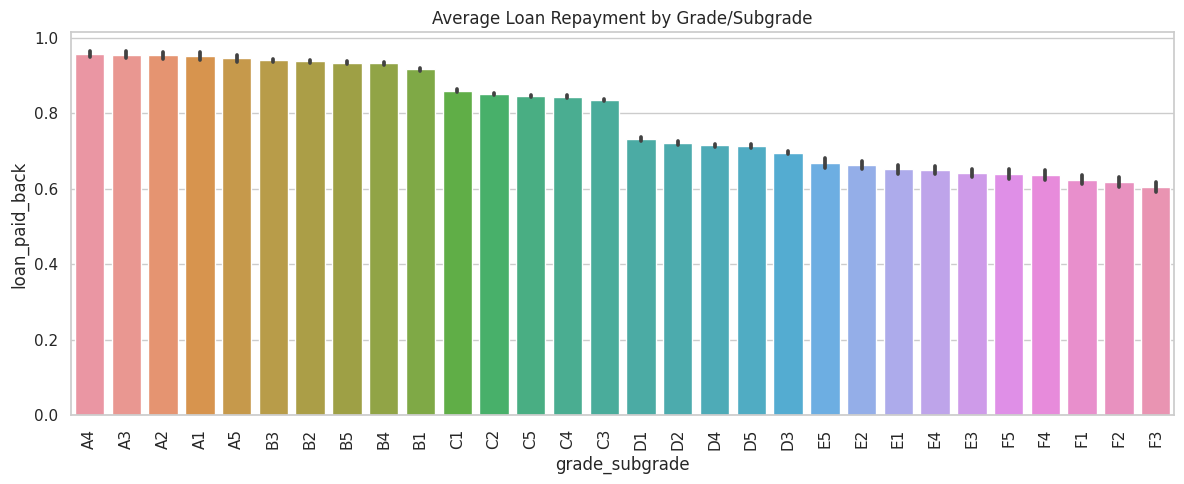

5️⃣ Creditworthiness heatmap...


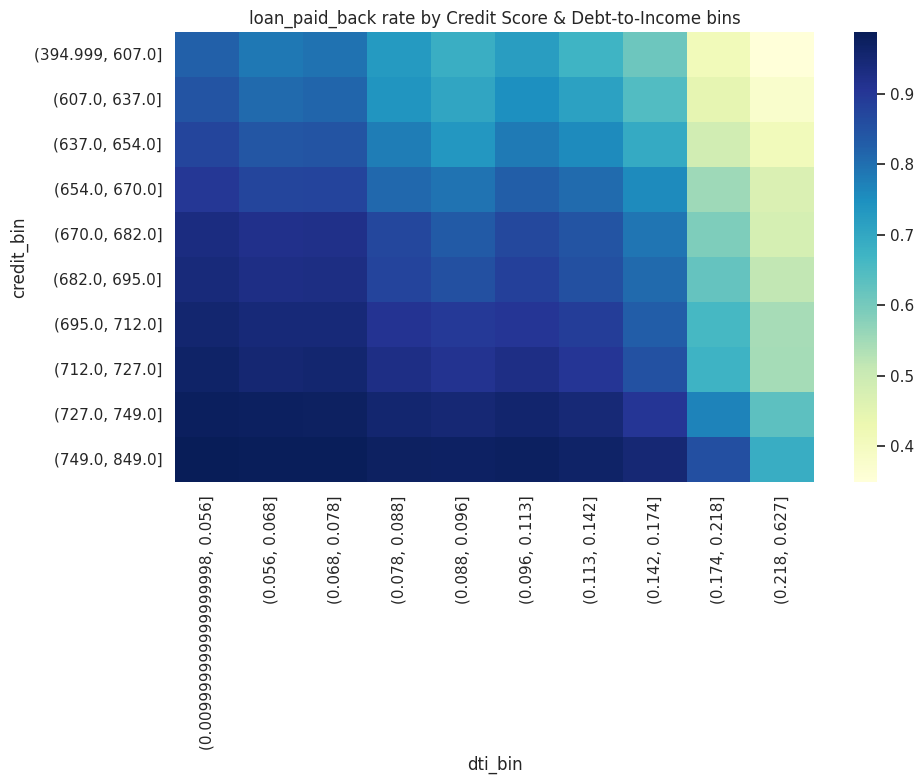

6️⃣ Correlation heatmap...


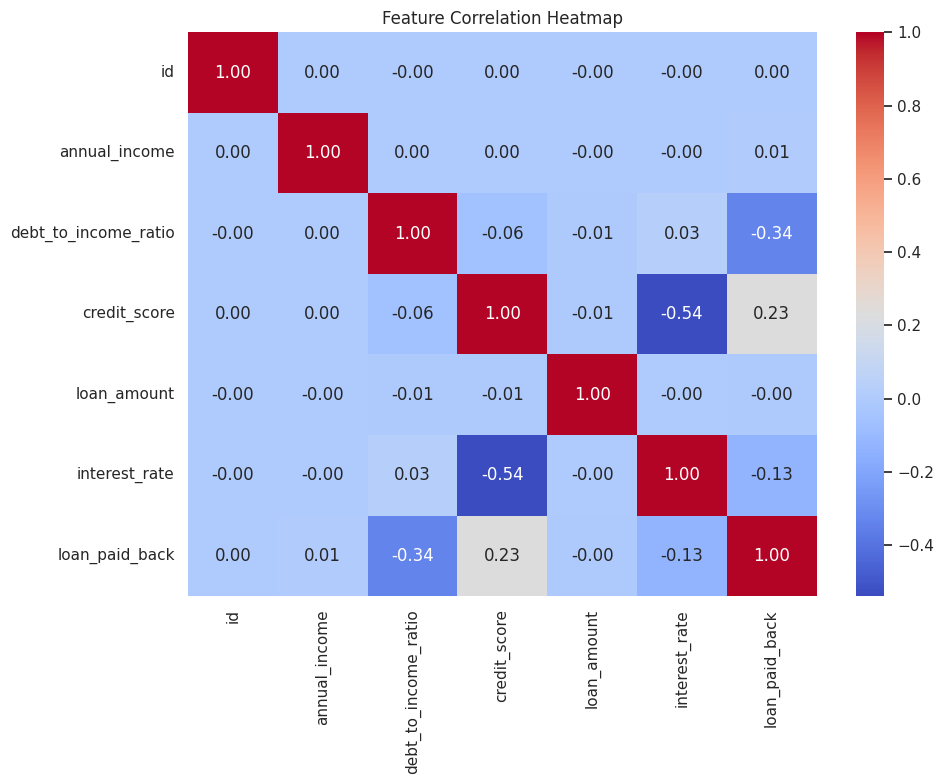

In [5]:
# ---------------------------------------------
# MAIN EXECUTION WRAPPER 
# ---------------------------------------------
def run_all_visuals(train, test):
    num_features = ['annual_income', 'debt_to_income_ratio', 'credit_score', 'loan_amount', 'interest_rate']
    cat_features = ['gender', 'marital_status', 'education_level', 'employment_status', 'loan_purpose', 'grade_subgrade']

    print("1️⃣ Comparing distributions...")
    compare_distributions(train, test, num_features)
    compare_categorical_proportions(train, test, cat_features)

    print("2️⃣ Exploring target relationships...")
    numeric_vs_target(train, num_features)
    scatter_with_target(train, x='loan_amount', y='interest_rate')

    print("3️⃣ Demographic analysis...")
    demographic_target_rate(train, ['gender', 'marital_status', 'education_level', 'employment_status'])

    print("4️⃣ Loan purpose & grade analysis...")
    purpose_and_grade_analysis(train)

    print("5️⃣ Creditworthiness heatmap...")
    credit_heatmap(train)

    print("6️⃣ Correlation heatmap...")
    correlation_heatmap(train)

# Call Functions
run_all_visuals(train, test)

# Create New Features

In [6]:
for df in [train, test]:
    # Numeric features
    df['income_to_loan'] = df['annual_income'] / (df['loan_amount'] + 1e-6)
    df['debt_burden'] = df['debt_to_income_ratio'] * df['loan_amount']
    df['total_interest_cost'] = df['interest_rate'] * df['loan_amount']
    df['disposable_income'] = df['annual_income'] * (1 - df['debt_to_income_ratio'])
    
    # Credit score bucket
    df['credit_score_bucket'] = pd.cut(df['credit_score'],
        bins=[300,650,700,750,850], labels=['poor','fair','good','excellent'])
    
    # Interaction features
    df['gender_marital'] = df['gender'] + '_' + df['marital_status']
    df['education_employment'] = df['education_level'] + '_' + df['employment_status']
    
    # Grade/Subgrade split
    df['grade'] = df['grade_subgrade'].str[0]
    df['subgrade'] = df['grade_subgrade'].str[1:]
    
    # Rare categories
    for col in ['loan_purpose','education_level','employment_status']:
        freq = df[col].value_counts(normalize=True)
        rare = freq[freq < 0.01].index
        df[col+'_rare'] = df[col].apply(lambda x: 'other' if x in rare else x)


# Preprocess

In [7]:
from sklearn.model_selection import train_test_split

drop_cols = ['id']  # ID is not predictive

# Separate Target
target = 'loan_paid_back'
X = train.drop(columns=drop_cols + [target])
y = train[target]

# Train/Test split before encoding
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [8]:
from sklearn.preprocessing import LabelEncoder
# Label encode categoricals 
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns

label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col].astype(str))
    # Handle unseen categories in test
    X_test[col] = X_test[col].map(lambda x: le.transform([x])[0] if x in le.classes_ else -1)
    X_test[col] = X_test[col].astype(int)
    label_encoders[col] = le

# Train XGB / LGBM

[0]	validation_0-auc:0.89817
[100]	validation_0-auc:0.91657
[200]	validation_0-auc:0.91830
[300]	validation_0-auc:0.91911
[400]	validation_0-auc:0.91954
[500]	validation_0-auc:0.91983
[600]	validation_0-auc:0.91996
[700]	validation_0-auc:0.91997
[706]	validation_0-auc:0.91998
Training until validation scores don't improve for 50 rounds
[100]	valid_0's auc: 0.916454
[200]	valid_0's auc: 0.918971
[300]	valid_0's auc: 0.919784
[400]	valid_0's auc: 0.920282
[500]	valid_0's auc: 0.920713
[600]	valid_0's auc: 0.921133
[700]	valid_0's auc: 0.921337
[800]	valid_0's auc: 0.921491
[900]	valid_0's auc: 0.921498
[1000]	valid_0's auc: 0.921534
Did not meet early stopping. Best iteration is:
[955]	valid_0's auc: 0.92155

MODEL PERFORMANCE (Test Set)
XGBoost   - AUC: 0.92000
LightGBM  - AUC: 0.92155
Ensemble  - AUC: 0.92116
Best Model: LightGBM (0.92155)


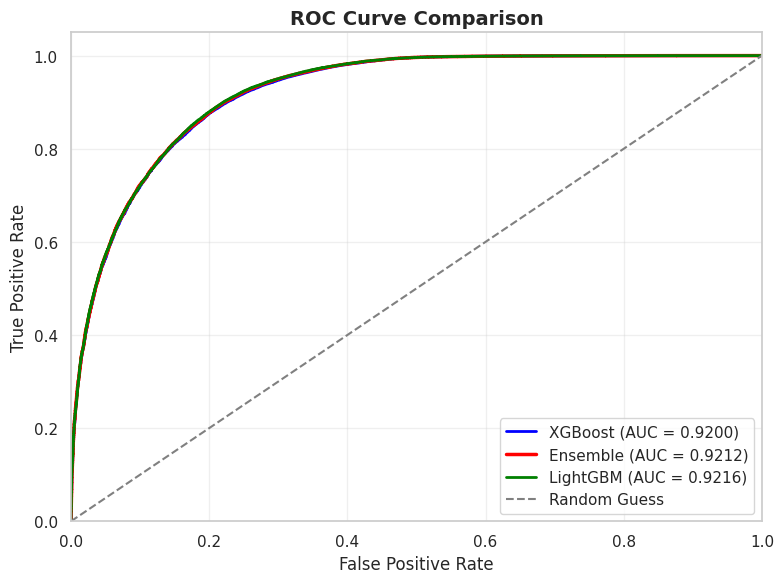

In [9]:
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import roc_auc_score, roc_curve, auc

# -----------------------------
# XGBoost 
# -----------------------------
xgb_model = xgb.XGBClassifier(
    n_estimators=1000,
    max_depth=7,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='auc',
    early_stopping_rounds=50
)

xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=100
)

# -----------------------------
# LightGBM 
# -----------------------------
lgb_model = lgb.LGBMClassifier(
    n_estimators=1000,
    max_depth=8,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    metric='auc',
    verbose=-1
)

lgb_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    callbacks=[
        lgb.early_stopping(stopping_rounds=50, verbose=True),
        lgb.log_evaluation(period=100)
    ]
)

# =============================
# EVALUATION: ROC AUC + Plot
# =============================

# Predictions
y_pred_xgb = xgb_model.predict_proba(X_test)[:, 1]
y_pred_lgb = lgb_model.predict_proba(X_test)[:, 1]

# Simple weighted ensemble
ensemble_pred = 0.6 * y_pred_xgb + 0.4 * y_pred_lgb
auc_ensemble = roc_auc_score(y_test, ensemble_pred)

# ROC AUC Scores
auc_xgb = roc_auc_score(y_test, y_pred_xgb)
auc_lgb = roc_auc_score(y_test, y_pred_lgb)

# Print Results
print("\n" + "="*50)
print("MODEL PERFORMANCE (Test Set)")
print("="*50)
print(f"XGBoost   - AUC: {auc_xgb:.5f}")
print(f"LightGBM  - AUC: {auc_lgb:.5f}")
print(f"Ensemble  - AUC: {auc_ensemble:.5f}")
print(f"Best Model: {'XGBoost' if auc_xgb > auc_lgb else 'LightGBM'} "
      f"({max(auc_xgb, auc_lgb):.5f})")
print("="*50)



# ROC Curve Plot
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_xgb)
fpr_ens, tpr_ens, _ = roc_curve(y_test, ensemble_pred)
fpr_lgb, tpr_lgb, _ = roc_curve(y_test, y_pred_lgb)



plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.4f})', color='blue', lw=2)
plt.plot(fpr_ens, tpr_ens, label=f'Ensemble (AUC = {auc_ensemble:.4f})', 
         color='red', linestyle='-', lw=2.5)
plt.plot(fpr_lgb, tpr_lgb, label=f'LightGBM (AUC = {auc_lgb:.4f})', color='green', lw=2)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1.5, label='Random Guess')

# Formatting
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve Comparison', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Show plot
plt.show()